# CONVOLUTIONAL NEURAL NETWORKS: MNIST DATASET con KERAS

## Conv2D en KERAS

### Arguments

tf.keras.layers.Conv2D(

    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)



- **filters**: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
- **kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
- **strides**: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
- **padding**: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.
- **data_format**: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels, height, width). If left unspecified, it uses the image_data_format value found in your Keras config file at ~/.keras/keras.json (if exists) else 'channels_last'. Note that the channels_first format is currently not supported by TensorFlow on CPU. Defaults to 'channels_last'.
- **dilation_rate**: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.
- **groups**: A positive integer specifying the number of groups in which the input is split along the channel axis. Each group is convolved separately with filters / groups filters. The output is the concatenation of all the groups results along the channel axis. Input channels and filters must both be divisible by groups.
- **activation**: Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).
- **use_bias**: Boolean, whether the layer uses a bias vector.
- **kernel_initializer**: Initializer for the kernel weights matrix (see keras.initializers). Defaults to 'glorot_uniform'.
- **bias_initializer**: Initializer for the bias vector (see keras.initializers). Defaults to 'zeros'.
- **kernel_regularizer**: Regularizer function applied to the kernel weights matrix (see keras.regularizers).
- **bias_regularizer**: Regularizer function applied to the bias vector (see keras.regularizers).
- **activity_regularizer**: Regularizer function applied to the output of the layer (its "activation") (see keras.regularizers).
- **kernel_constraint**: Constraint function applied to the kernel matrix (see keras.constraints).
- **bias_constraint**: Constraint function applied to the bias vector (see keras.constraints).

### Input shape

4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.

### Output shape

4+D tensor with shape: batch_shape + (filters, new_rows, new_cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (new_rows, new_cols, filters) if data_format='channels_last'. rows and cols values might have changed due to padding.

### Returns

A tensor of rank 4+ representing activation(conv2d(inputs, kernel) + bias).



## CARGANDO LOS DATOS

In [1]:
print('hi')

hi


In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
print('[INFO:] MNIST data...')
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

[INFO:] MNIST data...
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
import numpy as np

import sys

import tensorflow.keras
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.10.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [4]:
!nvidia-smi


Wed Nov 29 11:59:37 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.17                 Driver Version: 546.17       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   45C    P0              27W / 115W |    239MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots( nrows= 2, ncols= 2)
# ax[0][0] = plt.imshow(x_train_full[0], cmap= 'grey')
# ax[0][1] = plt.imshow(x_train_full[1], cmap= 'grey')
# ax[1][0] = plt.imshow(x_train_full[2], cmap= 'grey')
# ax[1][1] = plt.imshow(x_train_full[3], cmap= 'grey')

# plt.show()

## **PREPROCESADO y PARTICIÓN DE LOS DATOS**

In [6]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims


x_train, x_test = x_train_full / 255.0, x_test / 255.0           #Cambio al rango 0-1 -> Disminuyo CC
#print(y_train[0])


y_train_ohe = to_categorical(y_train_full, num_classes=10)       # One-hot encoding 
y_test_ohe = to_categorical(y_test, num_classes=10)              # se pasa a one hot encoding


# 3 subconjuntos train, validation, test 
x_train, x_val, y_train_ohe, y_val = train_test_split(x_train, y_train_ohe, test_size=0.1, random_state=42) 

#Expandir dimensiones porque en CNN tengo que especificar el número de canales
print('Sin expandir las dimensiones: ', x_train.shape)
x_train = expand_dims(x_train, axis=3)
x_val = expand_dims(x_val, axis=3)
x_test = expand_dims(x_test, axis=3)

print('Con las dimensiones expandidas:', x_train.shape, '(heigh, width, nºcanales)')  

Sin expandir las dimensiones:  (54000, 28, 28)
Con las dimensiones expandidas: (54000, 28, 28, 1) (heigh, width, nºcanales)


## CREANDO CNN


### Modelo secuencial: CREATE, COMPILE

In [7]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

cnn = Sequential([
    # para establecer valores por defecto en Conv2D
    # layers.DefaultConv2D(filters= 64, kernel= 5, input_shape= [28, 28, 1])
    
    # BASE MODEL 
    layers.Conv2D(filters= 32, kernel_size= (5,5), input_shape=[28, 28, 1], activation= 'relu' ),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation= 'relu'), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation= 'relu'), 
    #TOP MODEL
    layers.Flatten(), 
    layers.Dense(64, activation= 'relu'), 
    layers.Dense(10, activation= 'softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate= 0.0002)

cnn.compile(optimizer= optimizer,              # optimizador adam
            loss= 'categorical_crossentropy',  # las labels estan en One-Hot 
            metrics= ['accuracy'])

## FIT - CNN

In [9]:
H = cnn.fit(x_train, y_train_ohe, epochs= 10, batch_size= 128, validation_data=(x_val, y_val))

Epoch 1/10
422/422 [==============================] - 8s 8ms/step - loss: 0.5815 - accuracy: 0.8369 - val_loss: 0.1925 - val_accuracy: 0.9422
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.1438 - accuracy: 0.9578 - val_loss: 0.1116 - val_accuracy: 0.9677
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0926 - accuracy: 0.9719 - val_loss: 0.0818 - val_accuracy: 0.9767
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0723 - accuracy: 0.9783 - val_loss: 0.0686 - val_accuracy: 0.9802
Epoch 5/10
261/422 [=================>............] - ETA: 0s - loss: 0.0624 - accuracy: 0.9811

KeyboardInterrupt: 

## LEARNING CURVES

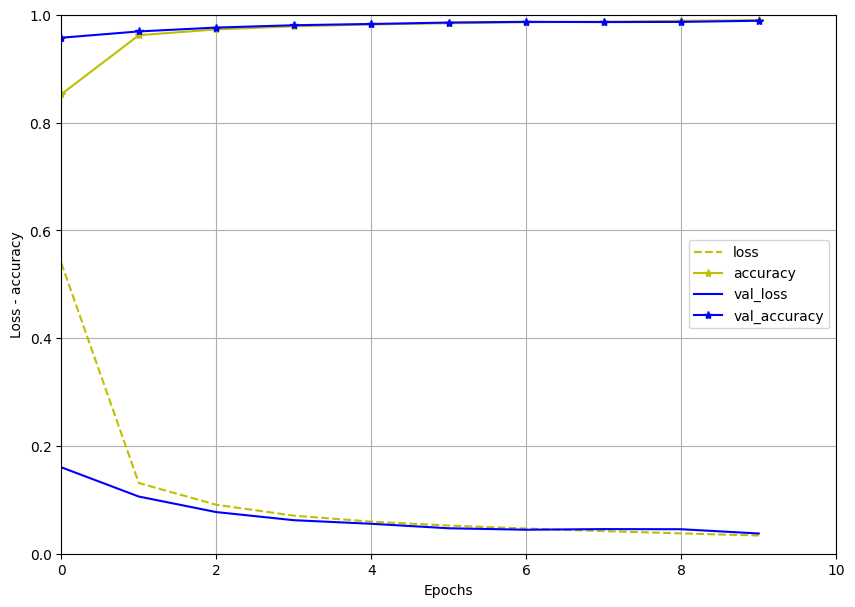

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(H.history).plot(figsize= (10, 7), 
                             xlim= [0, 10], ylim= [0, 1], 
                             grid= True, 
                             xlabel= 'Epochs', ylabel= 'Loss - accuracy', 
                             style= ['y--', 'y-*', 'b-', 'b-*'])
plt.show()

## EVALUANDO EL MODELO

In [10]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = cnn.predict(x_test, batch_size=128)
# print(y_te[0])
# print(predictions[0])
print(classification_report(y_test,                      # las labels normales no las ohe
                            predictions.argmax(axis=1))) # devuelve la predicción de mayor probabilidad

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

